# Drills

1.Load the data using the existing **diabetes** dataset from `scikit-learn`.

In [4]:
from sklearn.datasets import load_diabetes
import pandas as pd
df = load_diabetes( as_frame=True)
description = df["DESCR"]
df = df['data']
df
#df.head()


age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   

           s4        s5        s6  
0   -0.002592  0.019908 -0.017646  
1   -0.039493 -0.068330 -0.092204  
2   -0.002592  0.002864 -0.025930  
3    0.034309  0.022692 -0.009362  
4   -0.002592 -0.031991 -0.046641  
..        ...       ...       ...  
437 -0.002592  0.031193  0.007207  
438  0.034309 -0.018118  0.044485  
439 -0.011080 -0.046879  0.015491  
440  0.026560  0.044528 -0.025930  
441 -0.039493 -0.004220  0.003064  

[442 rows x 10 columns]

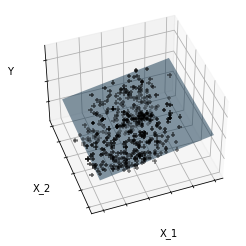

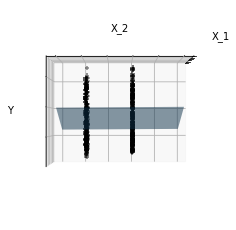

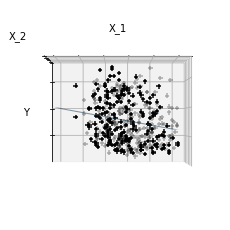

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

from sklearn import datasets, linear_model

X, y = datasets.load_diabetes(return_X_y=True)
indices = (0, 1)

X_train = X[:-20, indices]
X_test = X[-20:, indices]
y_train = y[:-20]
y_test = y[-20:]

ols = linear_model.LinearRegression()
ols.fit(X_train, y_train)


# #############################################################################
# Plot the figure
def plot_figs(fig_num, elev, azim, X_train, clf):
    fig = plt.figure(fig_num, figsize=(4, 3))
    plt.clf()
    ax = Axes3D(fig, elev=elev, azim=azim)

    ax.scatter(X_train[:, 0], X_train[:, 1], y_train, c='k', marker='+')
    ax.plot_surface(np.array([[-.1, -.1], [.15, .15]]),
                    np.array([[-.1, .15], [-.1, .15]]),
                    clf.predict(np.array([[-.1, -.1, .15, .15],
                                          [-.1, .15, -.1, .15]]).T
                                ).reshape((2, 2)),
                    alpha=.5)
    ax.set_xlabel('X_1')
    ax.set_ylabel('X_2')
    ax.set_zlabel('Y')
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])


# Generate the three different figures from different views
elev = 43.5
azim = -110
plot_figs(1, elev, azim, X_train, ols)

elev = -.5
azim = 0
plot_figs(2, elev, azim, X_train, ols)

elev = -.5
azim = 90
plot_figs(3, elev, azim, X_train, ols)

plt.show()

2.Explore your data by viewing and calculating some basic statistical details like percentile, mean. (TIP: Use Pandas!)

In [5]:
df.describe()

age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -3.634285e-16  1.308343e-16 -8.045349e-16  1.281655e-16 -8.835316e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123996e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665645e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670611e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564384e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320442e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  
mean   1.327024e-16 -4.574646e-16  3.777301e-16 -3.830854e-16 -3.412882e-16  
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  
min   -1.156131e-01 -1.023071e-01 -7.639450e-02 -1.260974e-01 -1.377672e-01  
25%   -3.035840e-02 -3.511716e-02 -3.949338e-02 -3.324879e-02 -3.317903e-02  
50%   -3.819065e-03 -6.584468e-03 -2.592262e-03 -1.947634e-03 -1.077698e-03  
75%    2.984439e-02  2.931150e-02  3.430886e-02  3.243323e-02  2.791705e-02  
max    1.987880e-01  1.811791e-01  1.852344e-01  1.335990e-01  1.356118e-01

3.Create some scatter plots or any other kind of plots that help you understand the data.

In [5]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title="Pandas Profiling Report")
profile

4.Create a model and predict the accuracy. 

5.Play with more datasets, such as **boston** from scikit-learn, or find datasets online, such as [this one](https://www.kaggle.com/dmvreddy91/usahousing) or [this one](https://www.kaggle.com/hellbuoy/car-price-prediction). (Careful: not all the datasets are appropriate for regression, so make sure to specify that to your query)